# KNN on Digits with PCA

In [81]:
import seaborn as sns; sns.set()

#Chargement
from sklearn.datasets import load_digits
digits = load_digits()

#Isolation
X = digits.data
Y = digits.target

print(X.shape)
print(Y.shape)

#TTS
from sklearn.model_selection import train_test_split as TTS
X_tr, X_te, Y_tr, Y_te = TTS(X, Y, stratify=Y, random_state=1)

(1797, 64)
(1797,)


In [82]:
#PCA

#Chargement
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

#Calibrage
pca.fit(X_tr)

#Transform
X_tr_PCA = pca.transform(X_tr)
X_te_PCA = pca.transform(X_te)

(X_tr_PCA.shape, X_te_PCA.shape)

((1347, 5), (450, 5))

In [83]:
#KNN

#Chargement
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=3)

#Entrainement
knn.fit(X_tr_PCA, Y_tr)

#Test
predictions = knn.predict(X_te_PCA)

#Performance
def accuracy(preds, Y):
    return (preds == Y).sum()/len(Y)
print('accuracy : ' ,accuracy(predictions, Y_te))

accuracy :  0.9222222222222223


# Pipeline & GridSearchCV

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [85]:
#Créer la pipeline
pipeline_details = [('PCA', PCA(random_state=42)),
                    ('KNN', KNN())]

pipeline = Pipeline(steps=pipeline_details)

In [86]:
#Paramètrer la gridSearch
hyperparameters = {}
hyperparameters['PCA__n_components'] = [i for i in range(1, X_tr.shape[1]+1, 3)]
hyperparameters['KNN__n_neighbors']  = [i for i in [1, 3, 5, 9, 21]]

In [87]:
#GridSearchCV
hyperparameter_search = GridSearchCV(pipeline,
                                     hyperparameters,
                                     scoring='accuracy', 
                                     cv=5)

In [88]:
#Execution de la GridSearchCV
hyperparameter_search.fit(X_tr, Y_tr)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('PCA', PCA(random_state=42)),
                                       ('KNN', KNeighborsClassifier())]),
             param_grid={'KNN__n_neighbors': [1, 3, 5, 9, 21],
                         'PCA__n_components': [1, 4, 7, 10, 13, 16, 19, 22, 25,
                                               28, 31, 34, 37, 40, 43, 46, 49,
                                               52, 55, 58, 61, 64]},
             scoring='accuracy')

In [89]:
hyperparameter_search.best_score_

0.9881343797328928

In [90]:
hyperparameter_search.best_params_

{'KNN__n_neighbors': 3, 'PCA__n_components': 25}

# Utiliser la meilleur config

In [96]:
pca = PCA(n_components=25)
knn = KNN(n_neighbors=3)

pca.fit(X_tr)
X_tr_PCA = pca.transform(X_tr)
X_te_PCA = pca.transform(X_te)
knn.fit(X_tr_PCA, Y_tr)
predictions = knn.predict(X_te_PCA)
accuracy_ = accuracy(predictions, Y_te)
accuracy_

0.9822222222222222

In [94]:
train_preds = knn.predict(X_tr_PCA)
accuracy_ = accuracy(train_preds, Y_tr)
accuracy_

0.9925760950259837

# Matrice de confusion

In [100]:
from sklearn.metrics import confusion_matrix

labels = range(10)# car on à des digits de 0 à 9 donc 10
cm_train = confusion_matrix(train_preds, Y_tr, labels=labels)
cm_test = confusion_matrix(predictions, Y_te, labels=labels)

In [101]:
cm_train

array([[133,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 136,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0, 133,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 135,   0,   0,   0,   0,   1,   3],
       [  0,   0,   0,   0, 136,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 135,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 136,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0, 133,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 129,   1],
       [  0,   0,   0,   1,   0,   1,   0,   1,   0, 131]])

In [102]:
cm_test

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 44]])

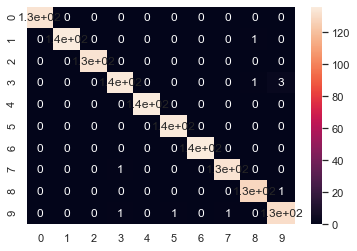

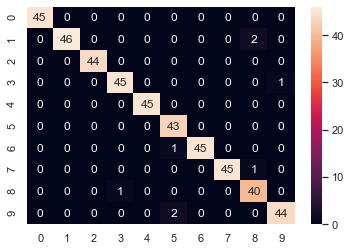

In [109]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

def show_cm(cm, labels):
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df_cm, annot=True)
    plt.show()
    
show_cm(cm_train, labels)
show_cm(cm_test, labels)